# Fundamentals of Data Analysis
Project notebook for Fundamentals of Data Analysis @ GMIT - 2020

Author: Maciej Izydorek (G00387873@gmit.ie) Github: [mizydorek](https://github.com/mizydorek/Fundamentals-of-Data-Analysis-Project-2020)

***

#### Table of contents
* [Description](#description)
* [Setup](#setup)
* [Introduction](#introduction)
* [Data Preprocessing](#preprocessing)
    * [Outliers](#outlires)
    * [Array](#array)
    * [Train test split](#train-test-split)
* [Simple Linear Regression](#simple-linear-regression)
    * [Build and train the model](#build-and-train-the-model)
    * [Predict](#predict)
    * [Best Fit Line](#best-fit-line)
    * [Evaluation](#evaluation)
* [Polynomial Regression](#polynomial-regression)
    * [Best degree](#best-degree)
    * [Build and train the model](#build-and-train-the-model)
    * [Predict](#predict)
    * [Best Fit Line](#best-fit-line)
    * [Evaluation](#evaluation)
* [Logistic Model](#logistic-model)
    * [Build and train the model](#build-and-train-the-model)
    * [Best Fit Line](#best-fit-line)
    * [Evaluation](#evaluation)
* [KNN Model](#KNN-model)
    * [Build and train the model](#build-and-train-the-model)
    * [Best Fit Line](#best-fit-line)
    * [Evaluation](#evaluation)
* [Conclusion](#conclusion)
* [References](#references)

####  Description

***

##### Wind turbine power production

*Perform and explain simple linear regression using Python on the powerproduction dataset. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis. Train a model based on the power production data that includes the wind speed and the power output by fitting simple linear regression to accurately predict a power output of wind turbine. By training a model that can give an estimate on how much it can generate power output based on the wind speed value.* 

#### Setup
***

#### — *Packages*

In [1]:
# Numerical arrays.
import numpy as np

# Data manipulation and analysis.
import pandas as pd 

# Import Linear regression and PolynomialFeatures.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
#Importing neighbors from SK-Learn.
from sklearn import neighbors
# Import mean_squared_error from sklearn metrics to calculate RMSE.
from sklearn.metrics import mean_squared_error
# Import r2_score module from sklearn metrics to calculate R-squared.
from sklearn.metrics import r2_score

# Import curve_fit from SciPy to Use non-linear least squares to fit a function to data.
from scipy.optimize import curve_fit


# Plotting.
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

##### — Settings

In [2]:
# plot settings.
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [16,9]

# Suppress matplotlib warning.
import warnings
warnings.filterwarnings("ignore")

# Set your custom color palette
colors = ["#495057", "#212529", "#6C757D", "#ADB5BD", "#CED4DA"]
sns.set_palette(sns.color_palette(colors))
cmap = matplotlib.colors.ListedColormap(colors)

#### Introduction
***

Project requires to built and train the model based on provided wind turbine power production dataset. Main model will be created by fitting simple linear regression to accurately predict a power output of wind turbine. In the follow part of the project, polynomial, logistic and K Nearest Neighbor models will be developed to compare closely against simple linear regression results. The evaluation of the models will be preformed by using Root Mean Squared Error and Coefficient of Determination (R-squared Score).

##### — Load Dataset

In [3]:
# Import dataset.
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")

##### — Preview of dataset

In [4]:
# Overwiew of dataset.
df.T

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
speed,0.0,0.125,0.15,0.225,0.275,0.325,0.400,0.450,0.501,0.526,...,24.499,24.525,24.575,24.65,24.75,24.775,24.85,24.875,24.95,25.0
power,0.0,0.000,0.00,0.000,0.000,4.331,5.186,3.826,1.048,5.553,...,0.000,0.000,0.000,0.00,0.00,0.000,0.00,0.000,0.00,0.0


In [5]:
# Display first 15 rows.
df.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
speed,0.0,0.125,0.15,0.225,0.275,0.325,0.400,0.450,0.501,0.526,0.551,0.576,0.626,0.676,0.701
power,0.0,0.000,0.00,0.000,0.000,4.331,5.186,3.826,1.048,5.553,6.498,5.241,4.220,7.974,9.746


In [6]:
# Display last 15 rows.
df.tail(15).T

,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
speed,24.249,24.299,24.349,24.374,24.399,24.499,24.525,24.575,24.65,24.75,24.775,24.85,24.875,24.95,25.0
power,103.700,93.694,93.078,98.223,95.117,0.000,0.000,0.000,0.00,0.00,0.000,0.00,0.000,0.00,0.0


In [7]:
# Shape of dataset.
df.shape

(500, 2)

In [8]:
# Have a look at some basic statistical details.
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


##### — Standard Missing values

In [9]:
# checks if dataset contains any missing values
# https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b
df.isnull().sum().sum()

0

##### — Non-Standard Missing values

In [10]:
# checks if dataset contains any missing values according to specified list
# https://stackoverflow.com/questions/43424199/display-rows-with-one-or-more-nan-values-in-pandas-dataframe
missing_values=['n/a', 'na', '--', ' ']
df = pd.read_csv('https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv', na_values=missing_values)
df.isna().sum().sum()

0

##### — Negative values

In [11]:
# checks if dataset contains any negative values
df[(df.speed < 0) & (df.power < 0)].sum().sum()

0.0

##### — Correlation

In [12]:
# Display correlation between two features.
df.corr()

,speed,power
speed,1.000000,0.853778
power,0.853778,1.000000


From a quick preview of dataset can be seen that dataset contains 500 rows and two columns with entries for wind and power outputs displayed accordingly in meters per second (m/s) and kilowatt-hour (kWh). There is no standard, non-standard or negative values in dataset. It can also be observed that at the tail of the dataset where wind speed is max out there are zero values in power column. Let's make some plots to visualize data.

##### — Plots

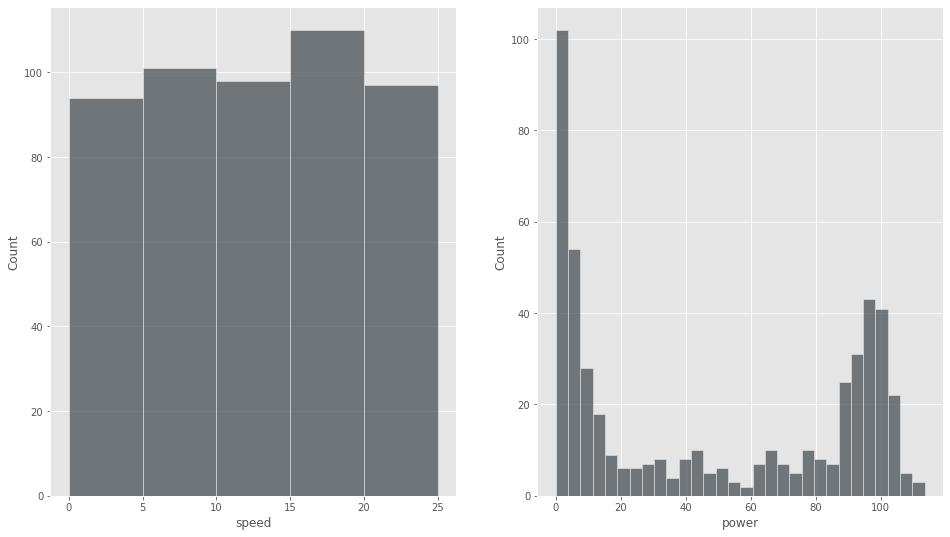

In [13]:
# check how the distribution looks like for speed and power column using hist plot.
fig, ax =plt.subplots(1,2)
sns.histplot(data=df, x="speed", bins=5, ax=ax[0]);
sns.histplot(data=df, x="power", bins=30, ax=ax[1]);

Both speed and power values do not fall into normal distribution but speed appears to look more like a uniform distriubtion.

*Worth noting that there is a high volume of variables in a first section (0-5) of power output.*

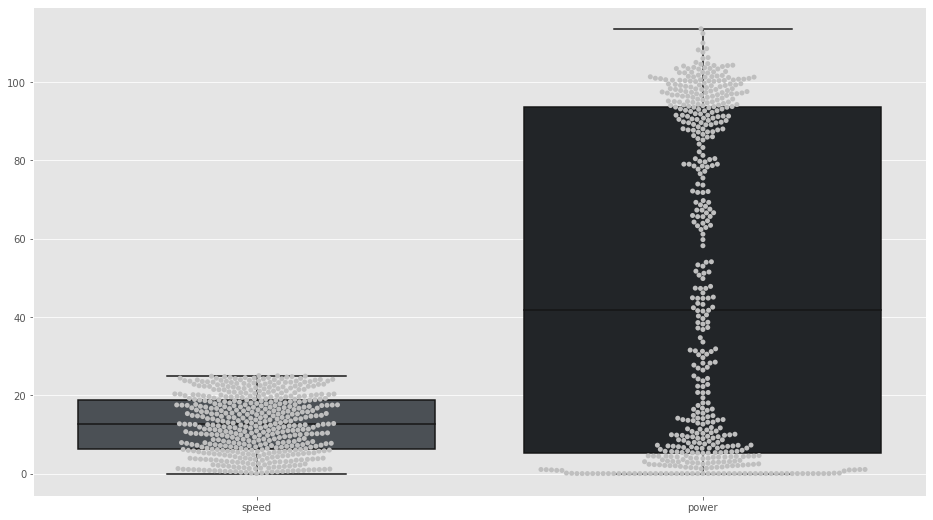

In [14]:
# Box plots are very useful to provide a visual summary of the data that enabling to identify outliers, 
# the dispersion of data set and shows if data is normally distributed or skewed.
sns.boxplot(data=df);
sns.swarmplot(data=df, color=".75");

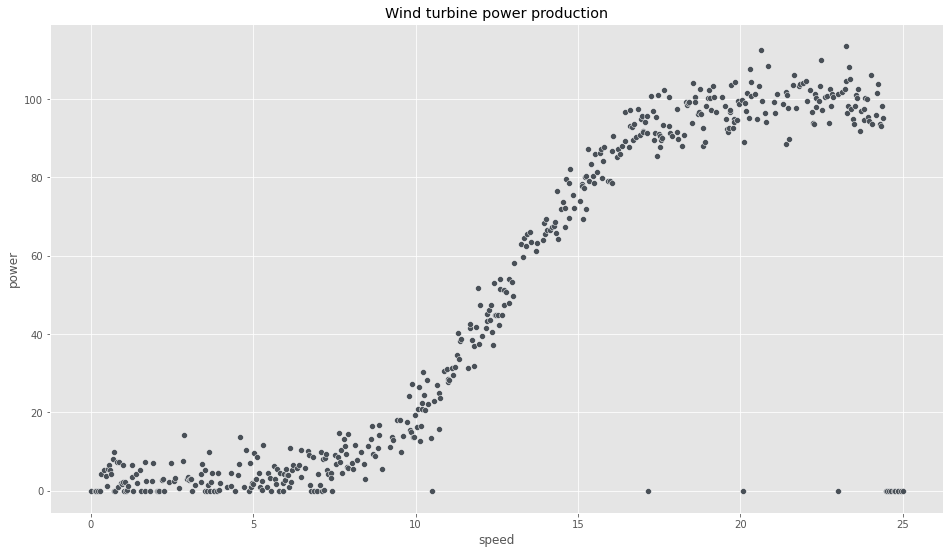

In [15]:
# Scatter plot clearly shows that we have some outliers.
sns.scatterplot(data=df, x='speed', y='power').set(title="Wind turbine power production");

##### — Assumption

Taking into consideration the output from data preview and what can be observed at the scatter plot some assumption has to be made. Power turbine has to generate some power output above certain level apart from wind direction and air density which are not included in dataset so will not be taken into the consideration. Additionally at the tail of dataset for a wind speed around 25 m/s the power output is 0 and this may result from shutting down wind turbine due to too strong wind that could harm the turbine. Based on given dataset that includes wind speed and power output generated by power turbine, three seems to be a sweet spot. 


#### Preprocessing of dataset
***

##### — Outliers

In [16]:
# let's remove the outliers according to assumption made above 
# finding on how to remove rows based on a conditional expression
# https://stackoverflow.com/questions/13851535/delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression-involving
df = df.drop(df[(df.speed > 3) & (df.power == 0)].index).reset_index(drop=True)
df.T

,0,1,2,3,4,5,6,7,8,9,...,458,459,460,461,462,463,464,465,466,467
speed,0.0,0.125,0.15,0.225,0.275,0.325,0.400,0.450,0.501,0.526,...,23.974,24.024,24.049,24.174,24.199,24.249,24.299,24.349,24.374,24.399
power,0.0,0.000,0.00,0.000,0.000,4.331,5.186,3.826,1.048,5.553,...,94.270,105.992,93.524,95.869,101.419,103.700,93.694,93.078,98.223,95.117


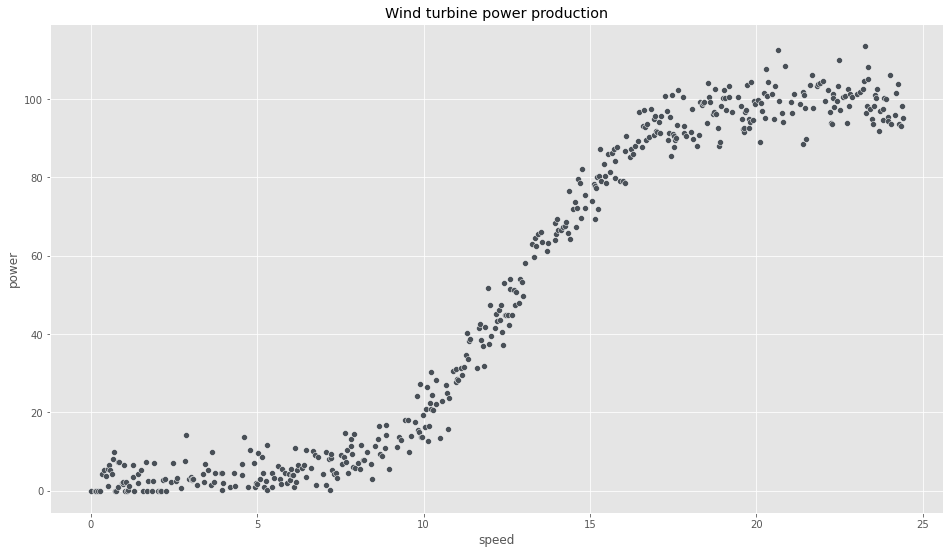

In [17]:
# plot of newly created dataset.
sns.scatterplot(data=df, x='speed', y='power').set(title="Wind turbine power production");

##### — Array

In [18]:
# Split dataframe into speed and power columns using pandas.
speed = df['speed']
power = df['power']

# Convert speed and power columns to numpy arrays.
x = df.iloc[:, :1].values 
y = df.iloc[:, 1].values

#### — Train Test Split

In [19]:
# Using train_test_split() from the scikit-learn library, makes it easy to split dataset into training and testing data.
from sklearn.model_selection import train_test_split

# Script splits the dataset into 75% train data and 25% test data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

####  Simple Linear Regression
***

![Linear Regression](https://miro.medium.com/max/688/0*Yfz5JM6W3a36FLD8.png)

Simple linear regression is a linear regression model that examines the linear relationship between two quantitative variables by fitting a linear equation that, as accurately as possible, predicts the dependent variable values based on function of the independent variable. 



A relationship between variables $y$ and $x$ is represented by equation:

$$y = m x + c$$

where $y$ is the dependent variable that will be estimate, $x$ is the independent variable that is used to make predictions, $m$ is the slope of the regression line and $c$ is a constant also known $y$ intercept (the value of $y$ when $x$ = 0).

##### — Build and train the model

In [20]:
# Linear Regression Using Scikit Learn.
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# Import LinearRegression model from sklearn linear model.
from sklearn.linear_model import LinearRegression
# Import mean_squared_error model from sklearn metrics needed for further evaluation of the model.
from sklearn.metrics import mean_squared_error

# Create a new linear regression model.
model = LinearRegression()

# Fit the data to the model.
model.fit(x_train, y_train);

##### — Predict

In [21]:
# Coefficient & intercept.
coeff = [model.coef_[0], model.intercept_]

# Y prediction using the linear model. 
y_pred = model.predict(x_test)

print('''The coefficient is {} 
The intercept is {}'''.format(model.coef_[0], model.intercept_))

The coefficient is 5.514314165694237 
The intercept is -18.449781779222498


##### — Best Fit line

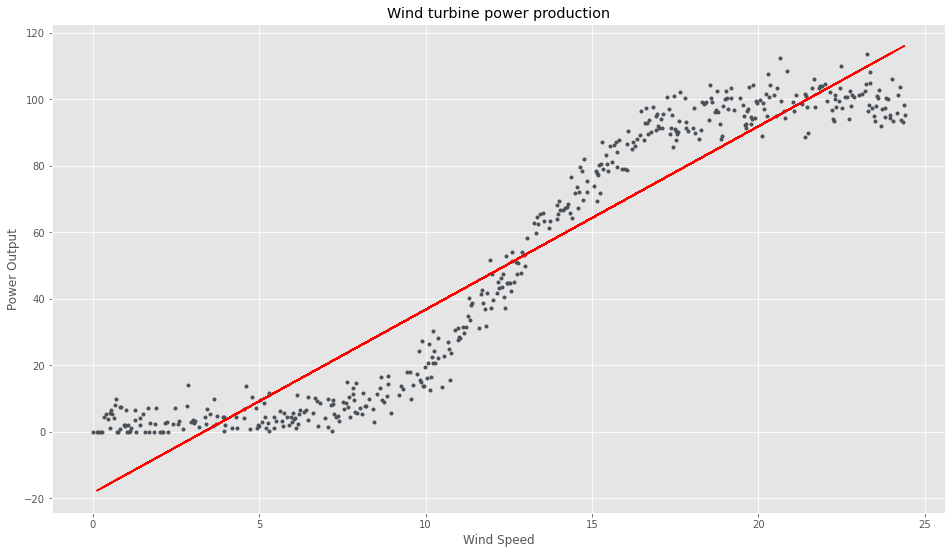

In [22]:
# Plot speed and power and the regression line.
plt.plot(x, y, '.');
plt.plot(x_test, y_pred, 'r-')
plt.title('Wind turbine power production')
plt.xlabel('Wind Speed')
plt.ylabel('Power Output');

#### — Evaluation

The evaluation of the model will be based on  Root Mean Squared Error and Coefficient of Determination(R-squared Score) to identify how the model predictions differ from original dataset. 

Root Mean Squared Error is the square root of sum of all errors divided by number of values.

$$ RMSE = \sqrt{\sum_{i=1}^m \frac{1}{m} (\hat y_i - y_i)^2)} $$

R-squared also known as the coefficient of determination is a statistical measure of how close the data are to the fitted regression line. 


$$ SS_t = \sum_{i=1}^m (y_i - \overline y_i)^2 $$

$$ SS_r = \sum_{i=1}^m (y_i - \hat y_i)^2 $$

$$ R^2 \equiv 1 - \frac{SS_r}{SS_t} $$

$ SS_t $ is the total sum of squares and $ SS_r $ is the total sum of squares of residuals.

In [23]:
# https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python
# Calculate the R-squared value.
r2 = r2_score(y_test, y_pred)

# Calculate Root Mean Squared Error.
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('''R2 score of linear regression is {} 
RMSE of linear regression is {}'''.format(r2, rmse))

R2 score of linear regression is 0.9017040577030462 
RMSE of linear regression is 13.159710581816261


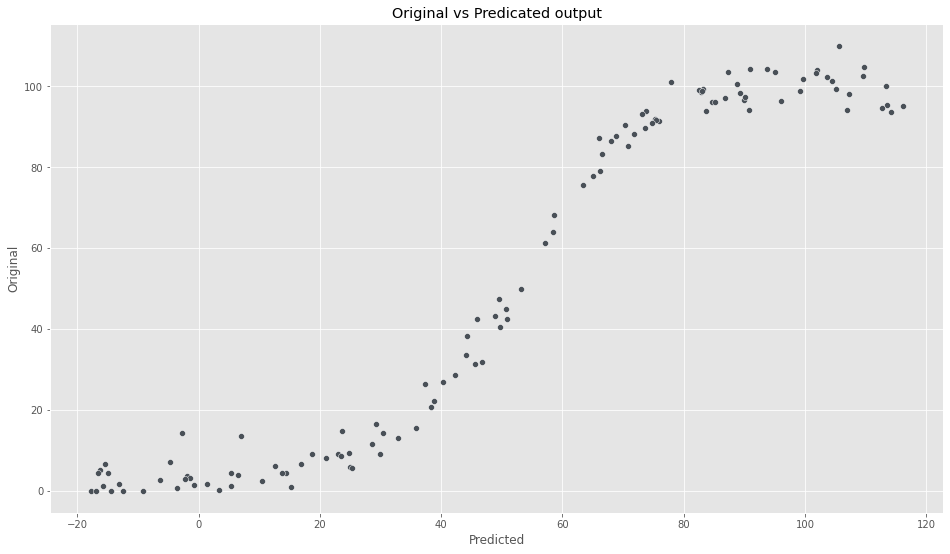

In [24]:
# Plot original versus predicted data. 
sns.scatterplot(y_pred, y_test).set(title='Original vs Predicated output', xlabel="Predicted", ylabel="Original");

Estimate the random data point from dataset and identify how the model predictions differ from original power value.

In [25]:
# Random data point of dataset.
df.iloc[150]

speed    8.308
power    9.812
Name: 150, dtype: float64

In [26]:
# Function that count the linear regression.
def lr(x, coeff):
    return x * coeff[0] + coeff[1]

In [27]:
lr(8.884, coeff)

30.539385268805106

In [28]:
# Calculate four data points to compare results with polynomial model.
print('''Power  5m/s : Speed {}kWh
Power 10m/s : Speed {}kWh
Power 15m/s : Speed {}kWh
Power 20m/s : Speed {}kWh'''.format(lr(5, coeff), lr(10, coeff), lr(15, coeff) ,lr(20, coeff)))


Power  5m/s : Speed 9.121789049248687kWh
Power 10m/s : Speed 36.69335987771987kWh
Power 15m/s : Speed 64.26493070619105kWh
Power 20m/s : Speed 91.83650153466223kWh


####  Polynomial Regression
***
![Polynomial Regression](https://media.geeksforgeeks.org/wp-content/uploads/20200304162359/Screenshot-2020-03-04-at-9.53.13-PM.png)

Polynomial regression is a form of regression analysis that examines the relationship between two quantitative variables by fitting a nonlinear equation that, as accurately as possible, predicts the dependent variable values based on function of the independent variable. 

#### — Best degree for Polynomial regression

In [29]:
# Find best degree for polynomial regression to fit into the data.
# https://stackoverflow.com/questions/47442102/how-to-find-the-best-degree-of-polynomials

rmses = []
degrees = np.arange(1, 20)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    # Assign degree and train features
    degree = PolynomialFeatures(degree=deg)
    x_train_poly = degree.fit_transform(x_train)

    # Create a Linear regression model and fit the data.
    poly = LinearRegression()
    poly.fit(x_train_poly, y_train)

    # Fit and predict test data and calculate Root Mean Squared Error.
    x_test_poly = degree.fit_transform(x_test)
    poly_predict = poly.predict(x_test_poly)
    rmse = np.sqrt(mean_squared_error(y_test, poly_predict))
    rmses.append(rmse)
        
    # Validate best degree by comparing Root Mean Squared Error.
    if min_rmse > rmse:
        min_rmse = rmse
        min_deg = deg
        
print('Best degree for polynomial regression is {}.'.format(min_deg))

Best degree for polynomial regression is 9.


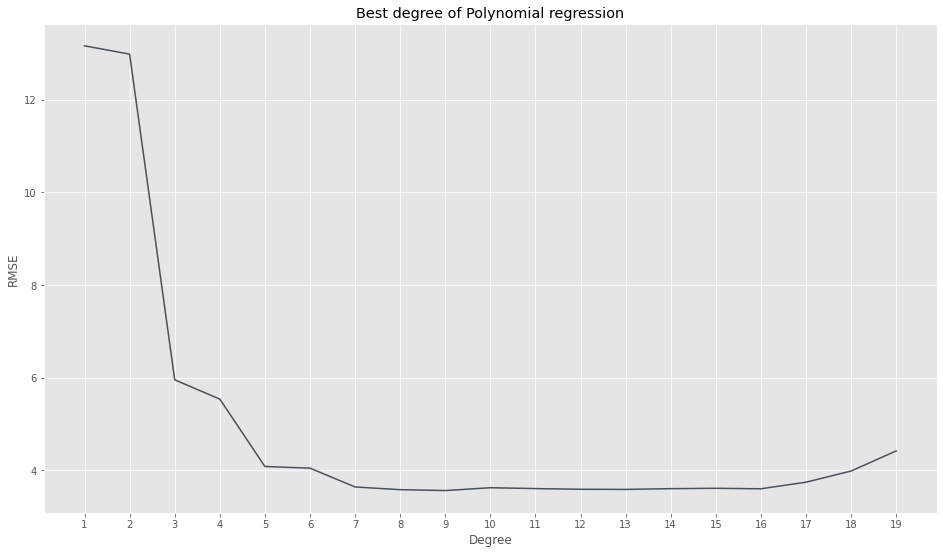

In [30]:
# Plot results of best polynomial regression degree.
plt.plot(degrees, rmses)
plt.title('Best degree of Polynomial regression')
plt.xticks(np.arange(min(degrees), max(degrees)+1, 1.0))
plt.xlabel('Degree')
plt.ylabel('RMSE');

#### — Comparison

In [31]:
# Calculate the third degree polynomial using Numpy polyfit.
# https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
# Return a vector of coefficients p that minimises the squared error in the order deg, deg-1, … 0.

# Third degree of Polynomial regression.
d3 = np.poly1d(np.polyfit(speed, power, 3))
coeff3 = np.poly1d(d3) 
# Assign data.
y3 = coeff3[3] * x**3 + coeff3[2] * x**2 + coeff3[1] * x + coeff3[0]

# Fifth degree of Polynomial regression.
d5 = np.poly1d(np.polyfit(speed, power, 5))
coeff5 = np.poly1d(d5) 
# Assign data.
y5 = coeff5[5] * x**5 + coeff5[4] * x**4 + coeff5[3] * x**3 + coeff5[2] * x**2 + coeff5[1] * x + coeff5[0]

# Seventh degree of Polynomial regression.
d7 = np.poly1d(np.polyfit(speed, power, 7))
coeff7 = np.poly1d(d7) 
y7 = coeff7[7] * x**7 + coeff7[6] * x**6 + coeff7[5] * x**5 + coeff7[4] * x**4 + coeff7[3] * x**3 + coeff7[2] * x**2 +  coeff7[1] * x + coeff7[0]

# Ninth degree of Polynomial regression.
d9 = np.poly1d(np.polyfit(speed, power, 9))
coeff9 = np.poly1d(d9) 
y9 = coeff9[9] * x**9 + coeff9[8] * x**8 + coeff9[7] * x**7 + coeff9[6] * x**6 + coeff9[5] * x**5 + coeff9[4] * x**4 + coeff9[3] * x**3 + coeff9[2] * x**2 +  coeff9[1] * x + coeff9[0]

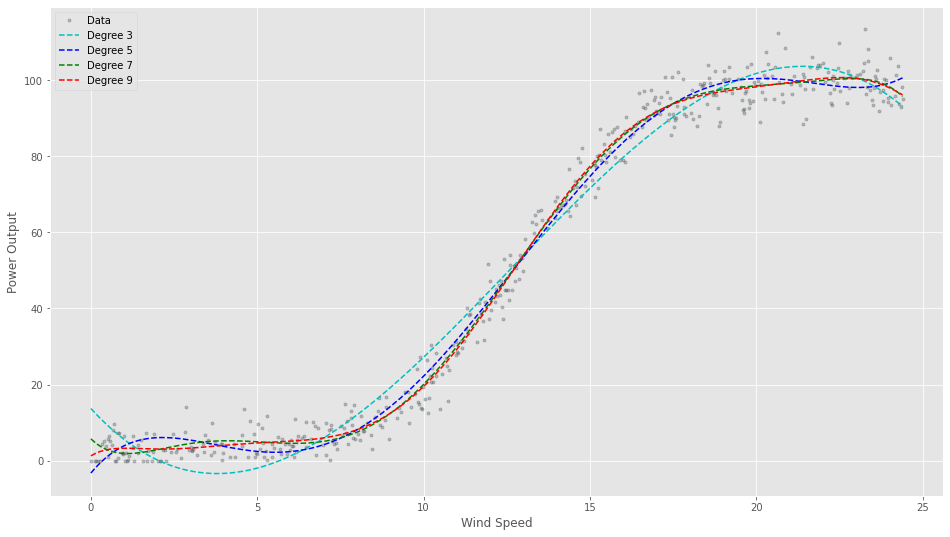

In [32]:
# Plot dataset with 3,5,7,9 degree polynomial regression.
plt.plot(x, y, '.', alpha=0.3, label='Data');
plt.plot(x, y3, 'c--', label="Degree 3")
plt.plot(x, y5, 'b--', label="Degree 5")
plt.plot(x, y7, 'g--', label="Degree 7")
plt.plot(x, y9, 'r--', label="Degree 9")
plt.legend()
plt.xlabel('Wind Speed')
plt.ylabel('Power Output');

##### — Build and train the model

In [33]:
# Define Polynomial degree.
degree = 9 

# Fit the data 
#poly = np.polyfit(speed, power, degree)
poly = np.poly1d(np.polyfit(speed, power, degree))

##### — Predict

In [34]:
#  The polynomial coefficients and intercept.
coeff = np.poly1d(poly) 
print(coeff)

           9             8             7           6           5
3.531e-08 x - 4.064e-06 x + 0.0001918 x - 0.00477 x + 0.06692 x
           4         3         2
 - 0.5315 x + 2.336 x - 5.255 x + 5.385 x + 1.243


In [35]:
y9 = coeff[9] * x**9 + coeff[8] * x**8 + coeff[7] * x**7 + coeff[6] * x**6 + coeff[5] * x**5 + coeff[4] * x**4 + coeff[3] * x**3 + coeff[2] * x**2 +  coeff[1] * x + coeff[0]

In [36]:
# Have a look at the coefficiant variables.
# Have a look at the m and c variables.
print('''The first coefficient is {} 
The second coefficient is {} 
The third coefficient is {} 
The fourth coefficient is {}
The fifth coefficient is {}
The sixth coefficient is {}
The seventh coefficient is {}
The eighth coefficient is {}
The ninth coefficient is {}
The intercept is {}'''.format(coeff[9], coeff[8], coeff[7], coeff[6], coeff[5], coeff[4], coeff[3], coeff[2], coeff[1], coeff[0]))

The first coefficient is 3.5305241726137554e-08 
The second coefficient is -4.064478667457068e-06 
The third coefficient is 0.00019184363420362261 
The fourth coefficient is -0.004770002224737841
The fifth coefficient is 0.06691932211991862
The sixth coefficient is -0.5315168552458741
The seventh coefficient is 2.3358848344682075
The eighth coefficient is -5.255482879065161
The ninth coefficient is 5.384576832752248
The intercept is 1.2427635497520622


##### — Best Fit line

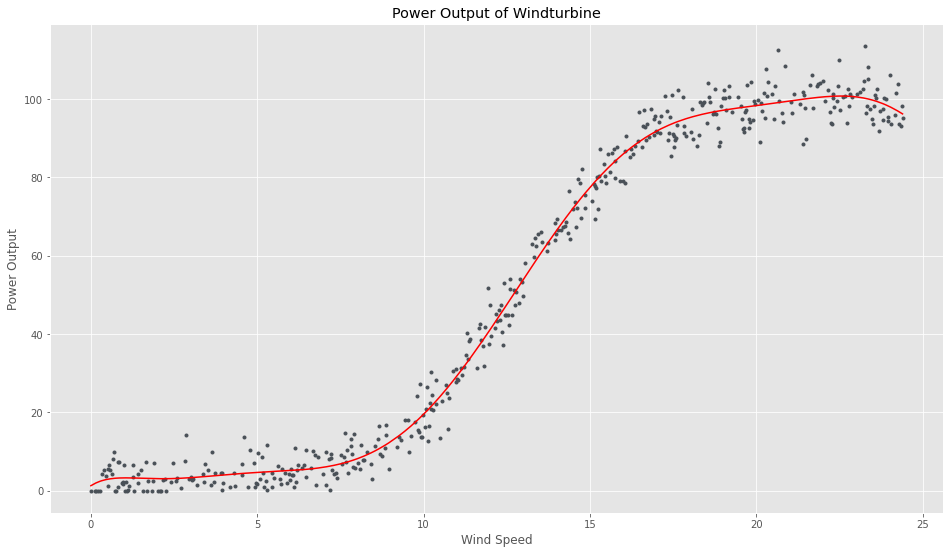

In [37]:
# Plot speed and power and the regression line.
plt.plot(x, y, '.');
plt.plot(x, y9, 'r-')
plt.title('Power Output of Windturbine')
plt.xlabel('Wind Speed')
plt.ylabel('Power Output');

#### — Evaluation

The evaluation of the model will be based on  Root Mean Squared Error and Coefficient of Determination(R-squared Score) to identify how the model predictions differ from original dataset. 

In [38]:
# Calculate the R-squared value.
r2 = r2_score(power, poly(speed))

# Calculate Root Mean Squared Error.
rmse = np.sqrt(mean_squared_error(power, poly(speed)))

print('''R2 score of linear regression is {} 
RMSE of linear regression is {}'''.format(r2, rmse))

R2 score of linear regression is 0.990469961338193 
RMSE of linear regression is 3.9990105993249174


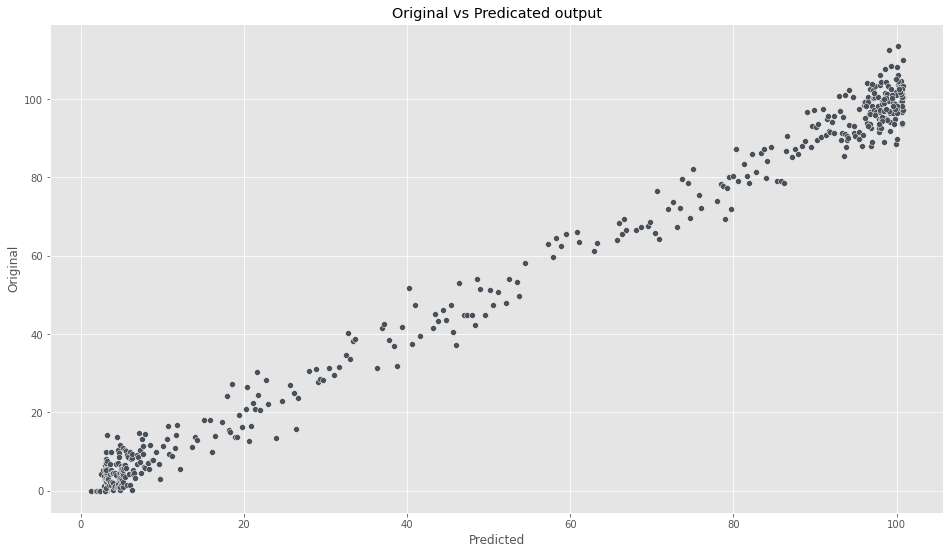

In [39]:
# Plot original versus predicted data. 
sns.scatterplot(poly(speed), power).set(title='Original vs Predicated output', xlabel="Predicted", ylabel="Original");

Estimate the random data point from dataset and identify how the model predictions differ from original power value.

In [40]:
# Random data point of dataset.
df.iloc[150]

speed    8.308
power    9.812
Name: 150, dtype: float64

In [41]:
# Function that count the linear regression.
def pr(x, coeff):
    y9 = coeff[9] * x**9 + coeff[8] * x**8 + coeff[7] * x**7 + coeff[6] * x**6 + coeff[5] * x**5 + coeff[4] * x**4 + coeff[3] * x**3 + coeff[2] * x**2 +  coeff[1] * x + coeff[0]
    return y9

In [42]:
pr(8.884, coeff)

11.794255156052408

In [43]:
# Calculate four data points to compare results with polynomial model.
print('Power  5m/s : Speed ' + str(coeff(5)) + 'kWh\n'
'Power 10m/s : Speed ' + str(coeff(10)) + 'kWh\n'
'Power 15m/s : Speed ' + str(coeff(15)) + 'kWh\n'
'Power 20m/s : Speed ' + str(coeff(20)) + 'kWh')

Power  5m/s : Speed 4.626794872884767kWh
Power 10m/s : Speed 19.48023025090351kWh
Power 15m/s : Speed 77.3731923384537kWh
Power 20m/s : Speed 98.29304302073484kWh


####  Logistic Model
***
![Logistic Regression](https://www.gormanalysis.com/blog/logistic-regression-fundamentals_files/figure-html/unnamed-chunk-4-1.png)

A logistic function, also called the sigmoid function having a characteristic of "S"-shaped curve that finds an equation that predicts an outcome for a binary variable, $Y$, from one or more response variables, $X$.

##### — Build and train the model

In [44]:
# Logistic function.
# Adopted from https://stackoverflow.com/questions/60160803/scipy-optimize-curve-fit-for-logistic-function
def func(x, a, b, c):
    return a / (1 + b * np.exp(-c * x))

In [45]:
# Initial guess for the parameters.
bounds=(max(power), np.median(power),min(power))

# Use non-linear least squares to fit a function to data.
popt, pcov = curve_fit(func, speed, power, bounds)
popt

array([1.00699312e+02, 7.02521211e+02, 5.16334413e-01])

##### — Best Fit line

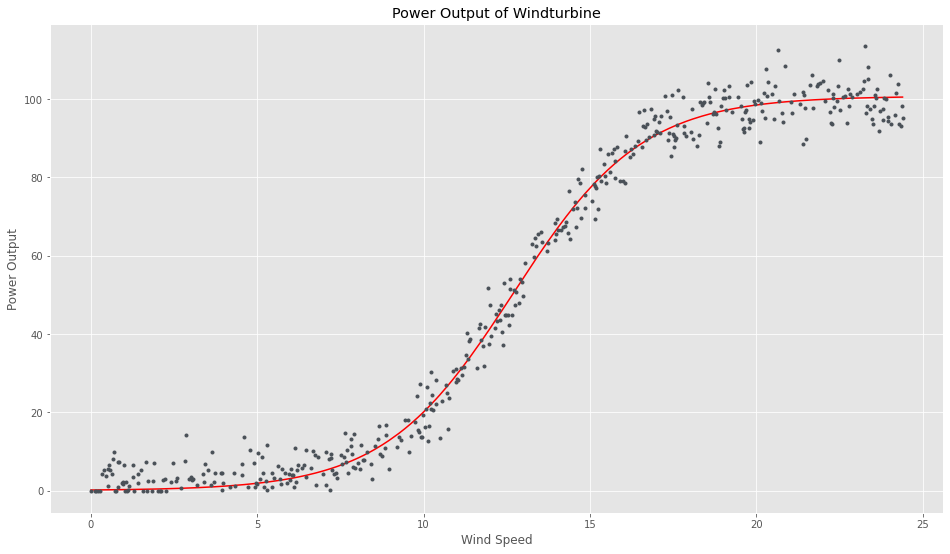

In [46]:
# Plot speed and power and the regression line.
plt.plot(speed, func(speed, *popt), 'r-',)
plt.plot(x, y, '.');
plt.title('Power Output of Windturbine')
plt.xlabel('Wind Speed')
plt.ylabel('Power Output');

#### — Evaluation

The evaluation of the model will be based on  Root Mean Squared Error and Coefficient of Determination(R-squared Score) to identify how the model predictions differ from original dataset. 

In [47]:
# Calculate the R-squared value.
r2 = r2_score(y, func(speed, *popt))

# Calculate Root Mean Squared Error.
rmse = np.sqrt(mean_squared_error(power, func(speed, *popt)))

print('''R2 score of linear regression is {} 
RMSE of linear regression is {}'''.format(r2, rmse))

R2 score of linear regression is 0.989163567098363 
RMSE of linear regression is 4.264306350013397


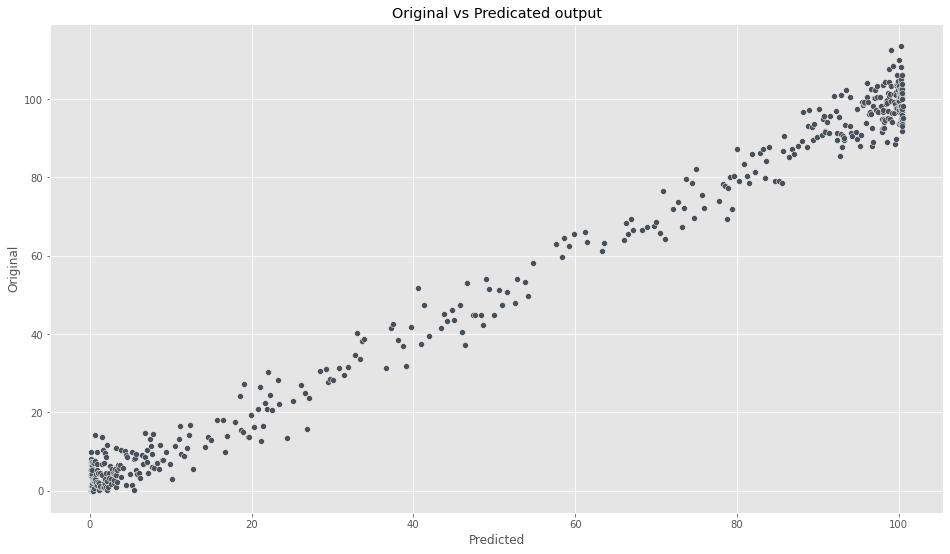

In [48]:
# Plot original versus predicted data. 
sns.scatterplot(func(speed, *popt), power).set(title='Original vs Predicated output', xlabel="Predicted", ylabel="Original");

Estimate the random data point from dataset and identify how the model predictions differ from original power value.

In [49]:
# Random data point of dataset.
df.iloc[150]

speed    8.308
power    9.812
Name: 150, dtype: float64

In [50]:
func(8.884, *popt)

12.350884990280804

In [51]:
# Calculate four data points to compare results with polynomial model.
print('Power  5m/s : Speed ' + str(func(5, *popt)) + 'kWh\n'
'Power 10m/s : Speed ' + str(func(10, *popt)) + 'kWh\n'
'Power 15m/s : Speed ' + str(func(15, *popt)) + 'kWh\n'
'Power 20m/s : Speed ' + str(func(20, *popt)) + 'kWh')

Power  5m/s : Speed 1.8598455560641063kWh
Power 10m/s : Speed 20.058827671024602kWh
Power 15m/s : Speed 77.21643106281022kWh
Power 20m/s : Speed 98.43475011999152kWh


#### K Nearest Neighbor Model



***
![knn regression](https://scikit-learn.org/stable/_images/sphx_glr_plot_regression_001.png)

K Nearest Neighbor falls in the category of supervised machine learning algorithms and can be used for both regression and classification predictive problems. Neighbors based learning method does not have a specialized training phase instead uses all of the data for training while classification and that is why it is a type of lazy learning algoritm. KNN is a non-parametric learning algorithm since it does not assume anything about the underlying data. It examines the values of a chosen K-nearest number of data points surrounding a target data point in order to calculate their average as its prediction. In the case of KNN regression, the weight parameter has to be provided to ensure on how the points will be weighted. It could be set to either uniform or distance and when not specified by default is set to uniform.

##### — Build and train the model

In [52]:
# Create KNN regressor and set k to 3 nearest points.
k = 3 
# By deafualt weight function is set to uniform.
knn = neighbors.KNeighborsRegressor(n_neighbors = k)

# Fit the regressor to the data.
knn.fit(x_train,y_train);

##### — Predict

In [53]:
# Test the model by using predict function on the trained model to make a predictions on a test data.
y_test_pred = knn.predict(x_test)
# All of x_test and predicted y_test_pred and y_test have to be sorted along the first axis.
y_test_pred = np.sort(y_test_pred, axis = 0) 
x_test = np.sort(x_test, axis = 0)
y_test = np.sort(y_test, axis = 0)

##### — Best Fit line

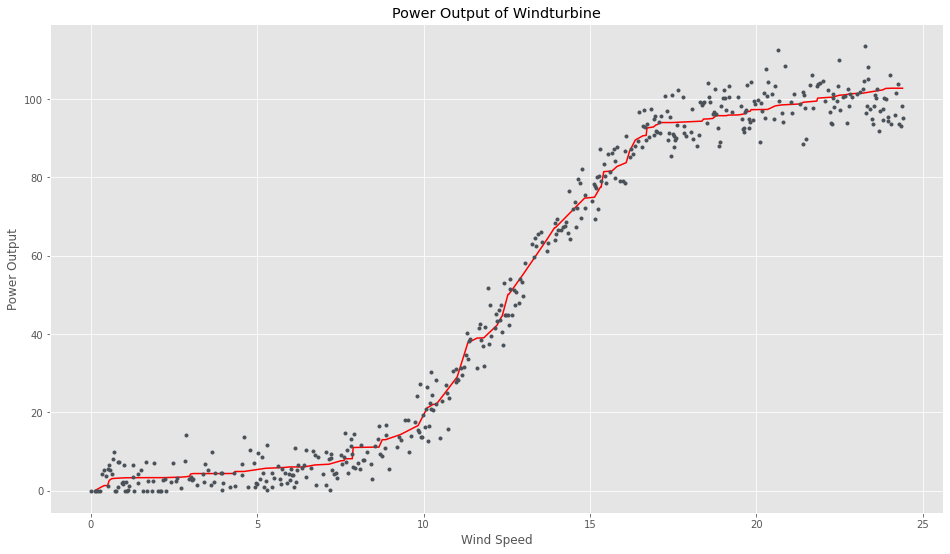

In [54]:
# Plot speed and power and the regression line.
plt.plot(x_test, y_test_pred, 'r-',)
plt.plot(x, y, '.');
plt.title('Power Output of Windturbine')
plt.xlabel('Wind Speed')
plt.ylabel('Power Output');

#### — Evaluation

The evaluation of the model will be based on  Root Mean Squared Error and Coefficient of Determination(R-squared Score) to identify how the model predictions differ from original dataset. 

In [55]:
# Calculate the R-squared value.
r2 = r2_score(y_test, y_test_pred)

# Calculate Root Mean Squared Error.
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('''R2 score of linear regression is {} 
RMSE of linear regression is {}'''.format(r2, rmse))

R2 score of linear regression is 0.9974479741334558 
RMSE of linear regression is 2.120416030511498


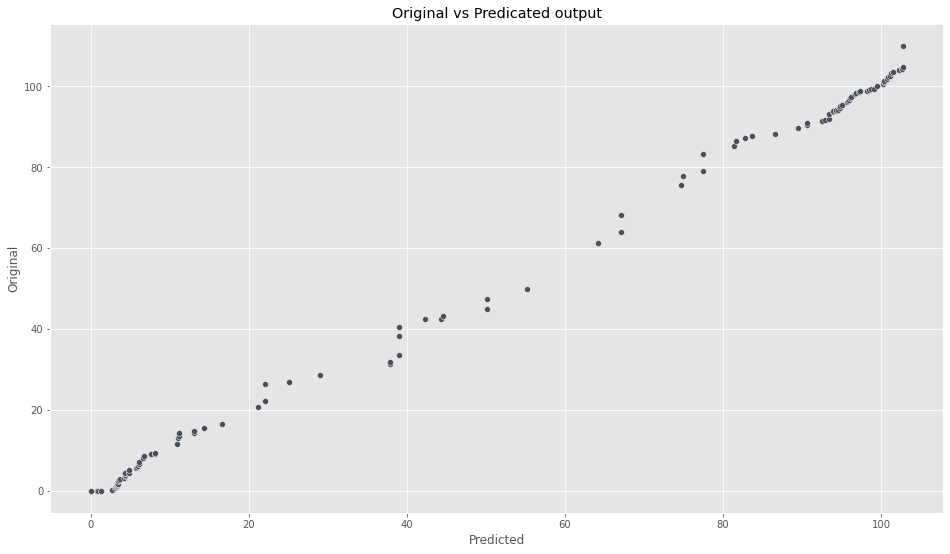

In [56]:
# Plot original versus predicted data. 
sns.scatterplot(y_test_pred, y_test).set(title='Original vs Predicated output', xlabel="Predicted", ylabel="Original");

Estimate the random data point from dataset and identify how the model predictions differ from original power value.

In [57]:
# Random data point of dataset.
df.iloc[150]

speed    8.308
power    9.812
Name: 150, dtype: float64

In [58]:
point = np.array(8.884)
knn.predict(point.reshape(1, -1))[0]

11.003666666666668

In [59]:
# Calculate four data points to compare results with polynomial model.
point5 = np.array(5)
point10 = np.array(10)
point15 = np.array(15)
point20 = np.array(20)

print('Power  5m/s : Speed ' + str(knn.predict(point5.reshape(1, -1))[0]) + 'kWh\n'
'Power 10m/s : Speed ' + str(knn.predict(point10.reshape(1, -1))[0]) + 'kWh\n'
'Power 15m/s : Speed ' + str(knn.predict(point15.reshape(1, -1))[0]) + 'kWh\n'
'Power 20m/s : Speed ' + str(knn.predict(point20.reshape(1, -1))[0]) + 'kWh')

Power  5m/s : Speed 4.369kWh
Power 10m/s : Speed 16.38333333333333kWh
Power 15m/s : Speed 74.77666666666666kWh
Power 20m/s : Speed 99.31966666666669kWh


#### Conclusion
***

Notebook contains four models — Simple Linear regression, Polynomial regression, Logistic model and K Nearest Neighbor Model — build based on given dataset to closely predict a power production of wind turbine. The evaluation of the models preformed by Root Mean Squared Error and Coefficient of Determination (R-squared Score) clearly shows that suprisingly the best model turned out to be K Nearest Neighbor which had only slightly better R-squared result than Ninth degree of Polynomial regression and Logistic model. 

Simple Linear regression<br>
R2 score of linear regression is 0.9017040577030462<br> 
RMSE of linear regression is 13.159710581816261

Polynomial regression<br>
R2 score of linear regression is 0.990469961338193<br>
RMSE of linear regression is 3.9990105993249174

Logistic model<br>
R2 score of linear regression is 0.989163567098363<br>
RMSE of linear regression is 4.264306350013397

K Nearest Neighbor model<br>
R2 score of linear regression is 0.9974479741334558<br>
RMSE of linear regression is 2.120416030511498

#### References
***

[1] — [Reformulation of parameters of the logistic function applied to power curves of wind turbines](https://www.sciencedirect.com/science/article/abs/pii/S0378779616300992?via%3Dihub)

[2] — [Non-linear regression model for wind turbine power curve](https://www.vdu.lt/wp-content/uploads/2018/02/Marciukaitis-2017-Non-linear-regression-model-for-wind-turbine-power-curve.pdf)

[3] — [Statistical learning for wind power : a modeling and
stability study towards forecasting](https://hal.archives-ouvertes.fr/hal-01373429/document)

[4] — [Simple linear regression](https://en.wikipedia.org/wiki/Simple_linear_regression)

[5] — [Linear regression](https://en.wikipedia.org/wiki/Linear_regression)

[6] — [Polynomial regression](https://en.wikipedia.org/wiki/Polynomial_regression)

[7] — [Yale: Linear regression](http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm#:~:text=A%20linear%20regression%20line%20has,y%20when%20x%20%3D%200)

[8] — [Introduction to inference about slope in linear regression](https://www.khanacademy.org/math/ap-statistics/inference-slope-linear-regression/inference-slope/v/intro-inference-slope)

[9] — [Sklearn: linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

[10] — [Sklearn: Polynomial regression](https://stats.stackexchange.com/questions/58739/polynomial-regression-using-scikit-learn)

[11] — [SciPy: Curve fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

[12] — [SciPy optimize curve fit for logistic function](https://stackoverflow.com/questions/60160803/scipy-optimize-curve-fit-for-logistic-function)

[13] — [Logitic Function](https://en.wikipedia.org/wiki/Logistic_function)

[14] — [Logitic Regression](https://en.wikipedia.org/wiki/Logistic_regression)

[15] — [Sklearn: KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

[16] — [Sklearn: Nearest Neighbors regression](https://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html)

[17] — [Understanding Regression Error Metrics in Python](https://www.dataquest.io/blog/understanding-regression-error-metrics/)
